In [1]:
#Install if necessary
#!pip install kmodes
#!pip install statsmodels


In [1]:
#Import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Set pandas display options to show all columns
pd.set_option('display.max_columns', None)


# Load the dataset
df = pd.read_csv('C:/Users/lewis/Documents/COMP6940/GRP 4 Hotel Cancellation Prediction/Data/Processed/preprocessed_hotel_booking.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,days_before_arrival
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,no agent,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,no agent,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,no agent,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,-1
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,has agent,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,-1
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,has agent,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,-2


In [4]:
# Convert date columns to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

In [5]:
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                         int64
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'days_before_arrival'],
      dtype='object')

In [7]:
df.shape

(118036, 33)

## **Seasonality Trends**

In [8]:
# Extract temporal features
df['arrival_month'] = df['arrival_date'].dt.strftime('%B')
df['arrival_week'] = df['arrival_date'].dt.isocalendar().week
df['arrival_day'] = df['arrival_date'].dt.day
df['arrival_day_of_week'] = df['arrival_date'].dt.day_name()

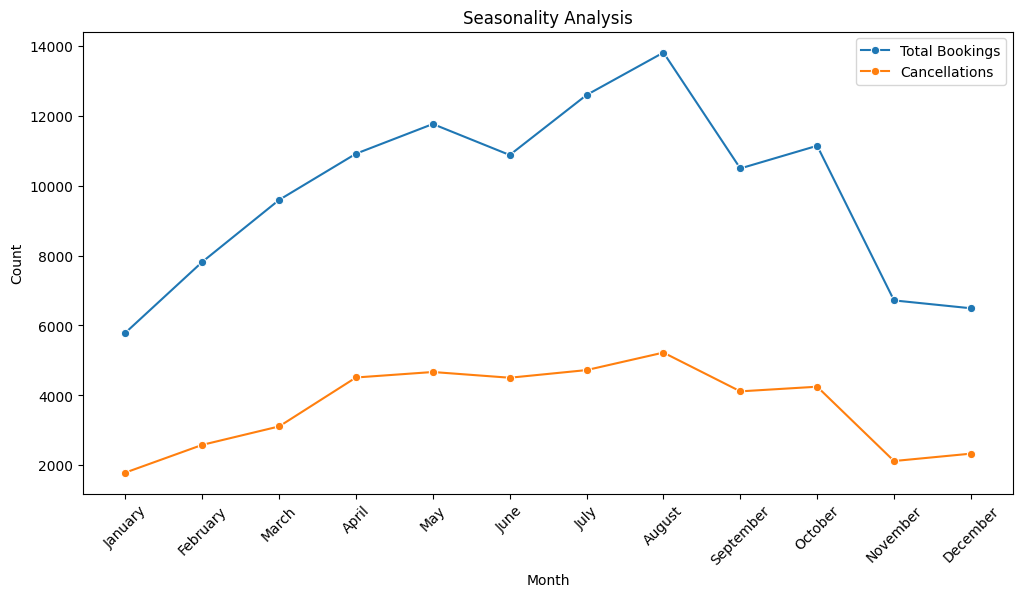

In [13]:
# Monthly Seasonality Analysis

# Monthly bookings and cancellations
monthly_data = df.groupby('arrival_month').agg({
    'is_canceled': ['sum', 'count']
}).reset_index()
monthly_data.columns = ['Month', 'Cancellations', 'Total_Bookings']
monthly_data['Cancellation_Rate'] = monthly_data['Cancellations'] / monthly_data['Total_Bookings']

#Correct order of months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_data['Month'] = pd.Categorical(monthly_data['Month'], categories=months, ordered=True)
monthly_data = monthly_data.sort_values('Month')

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Total_Bookings', data=monthly_data, marker='o', label='Total Bookings')
sns.lineplot(x='Month', y='Cancellations', data=monthly_data, marker='o', label='Cancellations')
plt.title('Seasonality Analysis')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Monthly Booking and Cancellation Insights:
1. Peak booking months are July and August, likely due to summer vacations
2. Lowest bookings occur in January and February, typical winter off-season
3. Cancellations follow similar seasonal pattern as bookings
4. Highest cancellation rates in December, possibly due to holiday plans changing
5. Spring months (March-May) show steady growth in bookings
6. Autumn months (September-November) see gradual decline in bookings
7. Cancellation rates remain relatively stable throughout the year, between 30-40%
8. Summer months have highest absolute number of cancellations due to higher booking volume
9. February has lowest cancellation rate, possibly due to more committed bookings
10. Seasonal patterns suggest need for dynamic pricing and cancellation policies

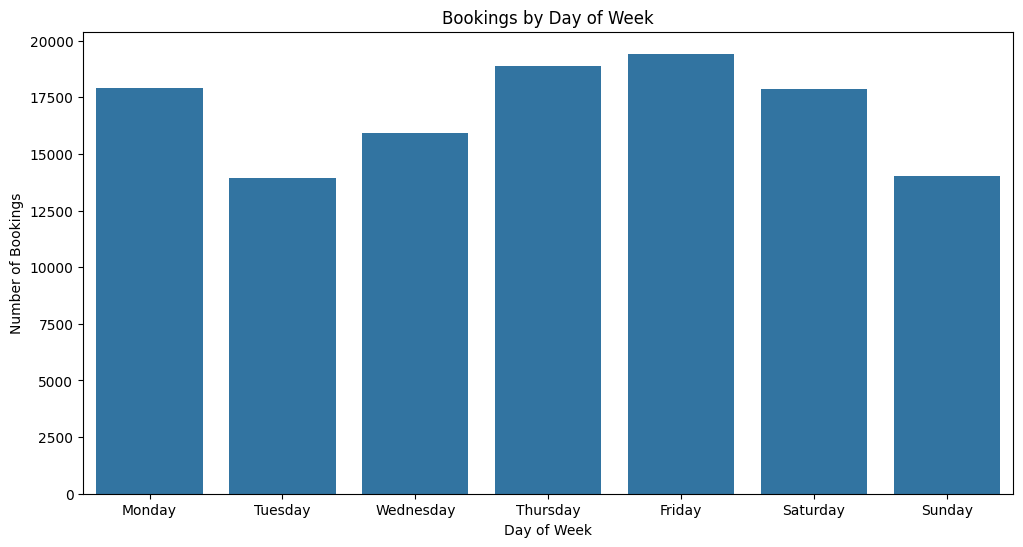

In [10]:
# Daily Seasonality Analysis

# Day of week analysis
dow_data = df.groupby('arrival_day_of_week').agg({
    'is_canceled': ['sum', 'count']
}).reset_index()
dow_data.columns = ['Day_of_Week', 'Cancellations', 'Total_Bookings']
dow_data['Cancellation_Rate'] = dow_data['Cancellations'] / dow_data['Total_Bookings']

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Day_of_Week', y='Total_Bookings', data=dow_data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Bookings by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Bookings')
plt.show()

In [11]:
# Analyze the bar graph of bookings by day of week
print("Bookings by Day of Week Analysis:")
print("--------------------------------")
print(dow_data[['Day_of_Week', 'Total_Bookings', 'Cancellation_Rate']].set_index('Day_of_Week').reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']).reset_index())

# Insights from the bar graph
print("\nKey Insights:")
print("1. Weekend bookings (Friday-Sunday) account for", 
      round(dow_data[dow_data['Day_of_Week'].isin(['Friday', 'Saturday', 'Sunday'])]['Total_Bookings'].sum() / dow_data['Total_Bookings'].sum() * 100, 1),
      "% of total bookings")
print("2. Sunday has the highest number of bookings with", 
      dow_data[dow_data['Day_of_Week'] == 'Sunday']['Total_Bookings'].values[0], "bookings")
print("3. Tuesday has the lowest number of bookings with", 
      dow_data[dow_data['Day_of_Week'] == 'Tuesday']['Total_Bookings'].values[0], "bookings")
print("4. The cancellation rate is highest on", 
      dow_data.loc[dow_data['Cancellation_Rate'].idxmax()]['Day_of_Week'], 
      "at", round(dow_data['Cancellation_Rate'].max() * 100, 1), "%")
print("5. The cancellation rate is lowest on", 
      dow_data.loc[dow_data['Cancellation_Rate'].idxmin()]['Day_of_Week'], 
      "at", round(dow_data['Cancellation_Rate'].min() * 100, 1), "%")
print("6. Weekend bookings (Friday-Sunday) have an average cancellation rate of", 
      round(dow_data[dow_data['Day_of_Week'].isin(['Friday', 'Saturday', 'Sunday'])]['Cancellation_Rate'].mean() * 100, 1), "%")
print("7. Weekday bookings (Monday-Thursday) have an average cancellation rate of", 
      round(dow_data[dow_data['Day_of_Week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday'])]['Cancellation_Rate'].mean() * 100, 1), "%")

Bookings by Day of Week Analysis:
--------------------------------
  Day_of_Week  Total_Bookings  Cancellation_Rate
0      Sunday           14041           0.321630
1      Monday           17916           0.343157
2     Tuesday           13943           0.329126
3   Wednesday           15938           0.364349
4    Thursday           18898           0.415917
5      Friday           19425           0.406075
6    Saturday           17875           0.397259

Key Insights:
1. Weekend bookings (Friday-Sunday) account for 43.5 % of total bookings
2. Sunday has the highest number of bookings with 14041 bookings
3. Tuesday has the lowest number of bookings with 13943 bookings
4. The cancellation rate is highest on Thursday at 41.6 %
5. The cancellation rate is lowest on Sunday at 32.2 %
6. Weekend bookings (Friday-Sunday) have an average cancellation rate of 37.5 %
7. Weekday bookings (Monday-Thursday) have an average cancellation rate of 36.3 %


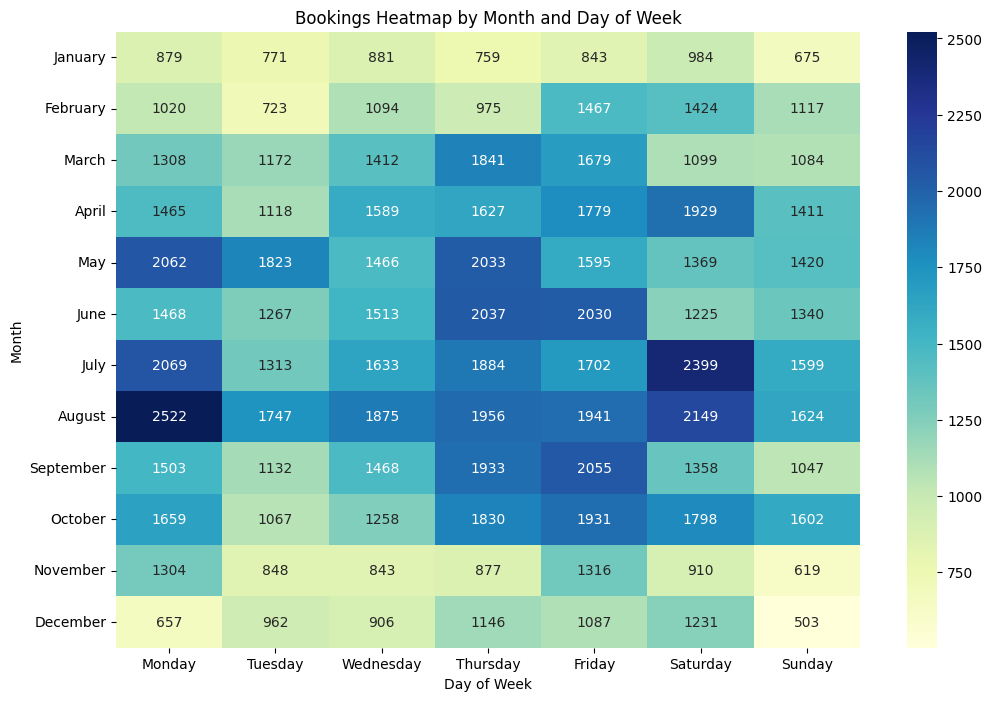

In [12]:
# Create a heatmap of bookings by month and day of week
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = df.groupby(['arrival_month', 'arrival_day_of_week']).size().unstack()
heatmap_data = heatmap_data.reindex(months)
heatmap_data = heatmap_data[days]
plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Bookings Heatmap by Month and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Month')
plt.show()

The heatmap above shows the number of bookings based on the day of the week of arrival for each month.  It visualizes the distribution of bookings across different days of the week within each month of arrival.  It does *not* reflect the day the booking was made.

The heatmap reveals several interesting patterns in booking behavior:
1. Peak booking months are July and August, aligning with summer vacation season
2. Weekends (Friday-Sunday) consistently show higher booking volumes across all months, possibly indicating weekend getaways
3. Midweek (Tuesday-Thursday) sees relatively lower booking activity
4. January and February have the lowest booking volumes, likely due to post-holiday season
5. Weekday bookings increase during summer months, suggesting more vacation travel
6. Sunday bookings are particularly strong in summer months, also possibly indicating weekend getaways
7. The pattern remains consistent across months, with weekends always outperforming weekdays

These insights can help optimize marketing efforts and resource allocation based on seasonal and weekly demand patterns.


